# The Climate Change Twitter Data - Team BUGS

**The dataset has been referred from Kaggle: https://www.kaggle.com/datasets/deffro/the-climate-change-twitter-dataset. The dataset is enormous with 14999 rows x 10 columns & consists of multiple deterministic factors like Created Time, Topic, Sentiment, Temperature_Average etc.The dataset is subject to strong multicollinearity & empty values.It consists of columns with different datatypes like float, integer, categorical, etc. The dataset is from 2006 to 2008.**

Seven dimensions of information are tied to each tweet, namely geolocation, user gender, climate change stance and sentiment, aggressiveness, deviations from historic temperature, and topic modeling, while accompanied by environmental disaster events information.

**The objectives to analyse the dataset are as follows:**

1) Analyse and Understand the dataset.

2) Fill empty values and remove unnecessary columns.

3) Find out possible improvements in the dataset.

In [1]:
'''importing necessary python libraries '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import csv
import os
from sklearn. impute import KNNImputer
%matplotlib inline

In [2]:
'''Loading the dataset to perform further steps'''
data =pd.read_csv("The Climate Change Twitter Data.csv")
print(data)

                      created_at         id         lng        lat  \
0      2006-06-06 16:06:42+00:00       6132         NaN        NaN   
1      2006-07-23 21:52:30+00:00      13275  -73.949582  40.650104   
2      2006-08-29 01:52:30+00:00      23160         NaN        NaN   
3      2006-11-07 02:46:52+00:00      57868         NaN        NaN   
4      2006-11-27 14:27:43+00:00     304553         NaN        NaN   
...                          ...        ...         ...        ...   
14994  2008-08-26 09:55:54+00:00  899157876         NaN        NaN   
14995  2008-08-26 10:30:11+00:00  899175411         NaN        NaN   
14996  2008-08-26 10:32:45+00:00  899176876  -73.819300  43.731180   
14997  2008-08-26 11:48:58+00:00  899223020         NaN        NaN   
14998  2008-08-26 12:01:19+00:00  899231717 -118.243680  34.052230   

                                  topic  sentiment    stance     gender  \
0                      Weather Extremes  -0.097180   neutral     female   
1        

**Removing unnecessary columns and imputing missing values using statistical methods - mean and median - for numerical values and mode for categorical values.**

**Now that we have an overview of the dataset, we move on to cleaning the dataset. It involves finding the number of missing values present in each column. In this section, we will also analyse and pick out columns we do not require for the purpose of our analysis. We can delete these redundant columns.**

**Since the Twitter Unique ID is not contributing much to our objective and hence, can be deleted.**

In [3]:
'''using "del" to delete all the redundant columns'''

del data['id']
data

,created_at,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive
...,...,...,...,...,...,...,...,...,...
14994,2008-08-26 09:55:54+00:00,NaN,NaN,Donald Trump versus Science,-0.398636,neutral,male,NaN,aggressive
14995,2008-08-26 10:30:11+00:00,NaN,NaN,Weather Extremes,0.410812,denier,male,NaN,not aggressive
14996,2008-08-26 10:32:45+00:00,-73.819300,43.731180,Donald Trump versus Science,-0.665196,neutral,female,-3.176450,aggressive
14997,2008-08-26 11:48:58+00:00,NaN,NaN,Importance of Human Intervantion,0.686545,believer,male,NaN,not aggressive


In [4]:
data.head() #printing the first few rows

,created_at,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness
0,2006-06-06 16:06:42+00:00,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


In [5]:
###Renaming the Column Headers
data = data.rename(columns={'created_at':'Created Time', 'lng':'Longitude', 'lat':'Latitude', 
                            'topic':'Topic', 'sentiment':'Sentiment', 'stance':'Stance', 'gender':'Gender',
                            'temperature_avg':'Temperature_Average','aggressiveness':'Aggressiveness'
                           })
data.head()

,Created Time,Longitude,Latitude,Topic,Sentiment,Stance,Gender,Temperature_Average,Aggressiveness
0,2006-06-06 16:06:42+00:00,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


In [6]:
data.info(verbose=True) #Finding the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Created Time         14999 non-null  object 
 1   Longitude            5689 non-null   float64
 2   Latitude             5689 non-null   float64
 3   Topic                14999 non-null  object 
 4   Sentiment            14999 non-null  float64
 5   Stance               14999 non-null  object 
 6   Gender               14999 non-null  object 
 7   Temperature_Average  5689 non-null   float64
 8   Aggressiveness       14999 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [7]:
data.isnull().sum()  #number of missing values in each column

Created Time              0
Longitude              9310
Latitude               9310
Topic                     0
Sentiment                 0
Stance                    0
Gender                    0
Temperature_Average    9310
Aggressiveness            0
dtype: int64

In [8]:
round(data.isnull().sum() / data.shape[0] * 100.00,2) #percentage of missing values in each column

Created Time            0.00
Longitude              62.07
Latitude               62.07
Topic                   0.00
Sentiment               0.00
Stance                  0.00
Gender                  0.00
Temperature_Average    62.07
Aggressiveness          0.00
dtype: float64

In [9]:
data.isnull().sum().sum()/data.size * 100 

20.690268240104896

Since we have missing values,we will fill the missing values using mean or median for numerical values and mode for categorical values. We will use mode for Gender, Temperature_Average columns, since they are categorical values. We will use median for Lattitude, Longitude, since median will give us the closest to accurate answer to fill in the value. We will use mean for income.

# Without Imputation

In [10]:
print("Median - " + str(data.Longitude.median())) #To fill the missing value we need the median of the longitude

Median - -82.55402


In [11]:
data.Longitude.fillna(data.Longitude.median(), inplace=True) #Filling that median value in missing value(Using  Statistical methods to fill missing values)

In [12]:
print("Median - " + str(data.Latitude.median())) #To fill the missing value we need the median of the latitude

Median - 40.6022059


In [13]:
data.Latitude.fillna(data.Latitude.median(), inplace=True) #Filling the above median into the lattitude missing values

In [14]:
data.head() #printing the first few rows

,Created Time,Longitude,Latitude,Topic,Sentiment,Stance,Gender,Temperature_Average,Aggressiveness
0,2006-06-06 16:06:42+00:00,-82.554020,40.602206,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,-82.554020,40.602206,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,-82.554020,40.602206,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,-82.554020,40.602206,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


In [15]:
print("Mode - " + str(data.Gender.mode())) #Since this is a categorical value we are using mode to know the gender either male or female.

Mode - 0    male
Name: Gender, dtype: object


In [16]:
data['Gender'] = data['Gender'].replace({'undefined': 'male'}) #Since the mode is male we are filling the undefined value as male.
print(data['Gender']) #Printing the gender data

0        female
1          male
2          male
3          male
4          male
          ...  
14994      male
14995      male
14996    female
14997      male
14998      male
Name: Gender, Length: 14999, dtype: object


In [17]:
print("Median - " + str(data.Temperature_Average.median())) #Since the Temperature_average is a numerical value and we finding median to fill the missing values

Median - -0.043621335


In [18]:
data.Temperature_Average.fillna(data.Temperature_Average.median(), inplace=True) #Filling the median values
data.head() #printing the first few rows

,Created Time,Longitude,Latitude,Topic,Sentiment,Stance,Gender,Temperature_Average,Aggressiveness
0,2006-06-06 16:06:42+00:00,-82.554020,40.602206,Weather Extremes,-0.097180,neutral,female,-0.043621,aggressive
1,2006-07-23 21:52:30+00:00,-73.949582,40.650104,Weather Extremes,0.575777,neutral,male,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,-82.554020,40.602206,Weather Extremes,0.500479,neutral,male,-0.043621,aggressive
3,2006-11-07 02:46:52+00:00,-82.554020,40.602206,Weather Extremes,0.032816,neutral,male,-0.043621,aggressive
4,2006-11-27 14:27:43+00:00,-82.554020,40.602206,Importance of Human Intervantion,-0.090428,neutral,male,-0.043621,aggressive


In [19]:
round(data.isnull().sum() / data.shape[0] * 100.00,2) #Checking the missing values again

Created Time           0.0
Longitude              0.0
Latitude               0.0
Topic                  0.0
Sentiment              0.0
Stance                 0.0
Gender                 0.0
Temperature_Average    0.0
Aggressiveness         0.0
dtype: float64

We have filled up all of our missing values using the statistical methods. We are moving forward to our analysis.

To undertand the most number of people who tweets, we visualise it through a pie chart. The pie chart gives overview of the distribution of the tweets according to the topics.

# Pie Chart

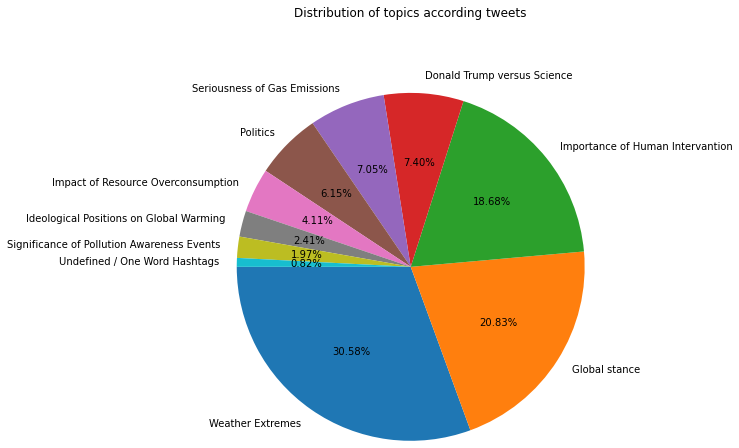

In [20]:
newregiondata = data['Topic'].value_counts().rename_axis('Topics').reset_index(name='Counts') #getting regions and counts

mylabels=newregiondata.Topics #assigning labels and values for plotting pie chart
myvalues=newregiondata.Counts
plt.pie(myvalues, labels=mylabels, startangle=180, radius = 2, autopct = '%2.2f%%')
plt.title("Distribution of topics according tweets\n\n\n\n\n\n\n\n\n") #title 
plt.show() #show chart

**The above Pie Chart depicts that total percentage of tweets in different topics related to the Climate Change. Most people (30.8%) have tweeted on the topic of weather extremes because from past decade there is difference in usual weather pattern (which might be the reason) and most people are aware of unusual weather pattern, and then followed by Global stance(20.83%) and Importance of human Intervation (10.68%) are next trending tweet topics.**

**The second least percentage of tweets is for the 'Significance of Pollution Awareness Events' topic with only 1.97 of the total tweets percentage which can indicate that majority of twitter population is not aware of the pollution awareness events and also their significance which play major role in climate change and global warming, and the One Word Hashtags topic is the least (0.82%)**

# Bar chart

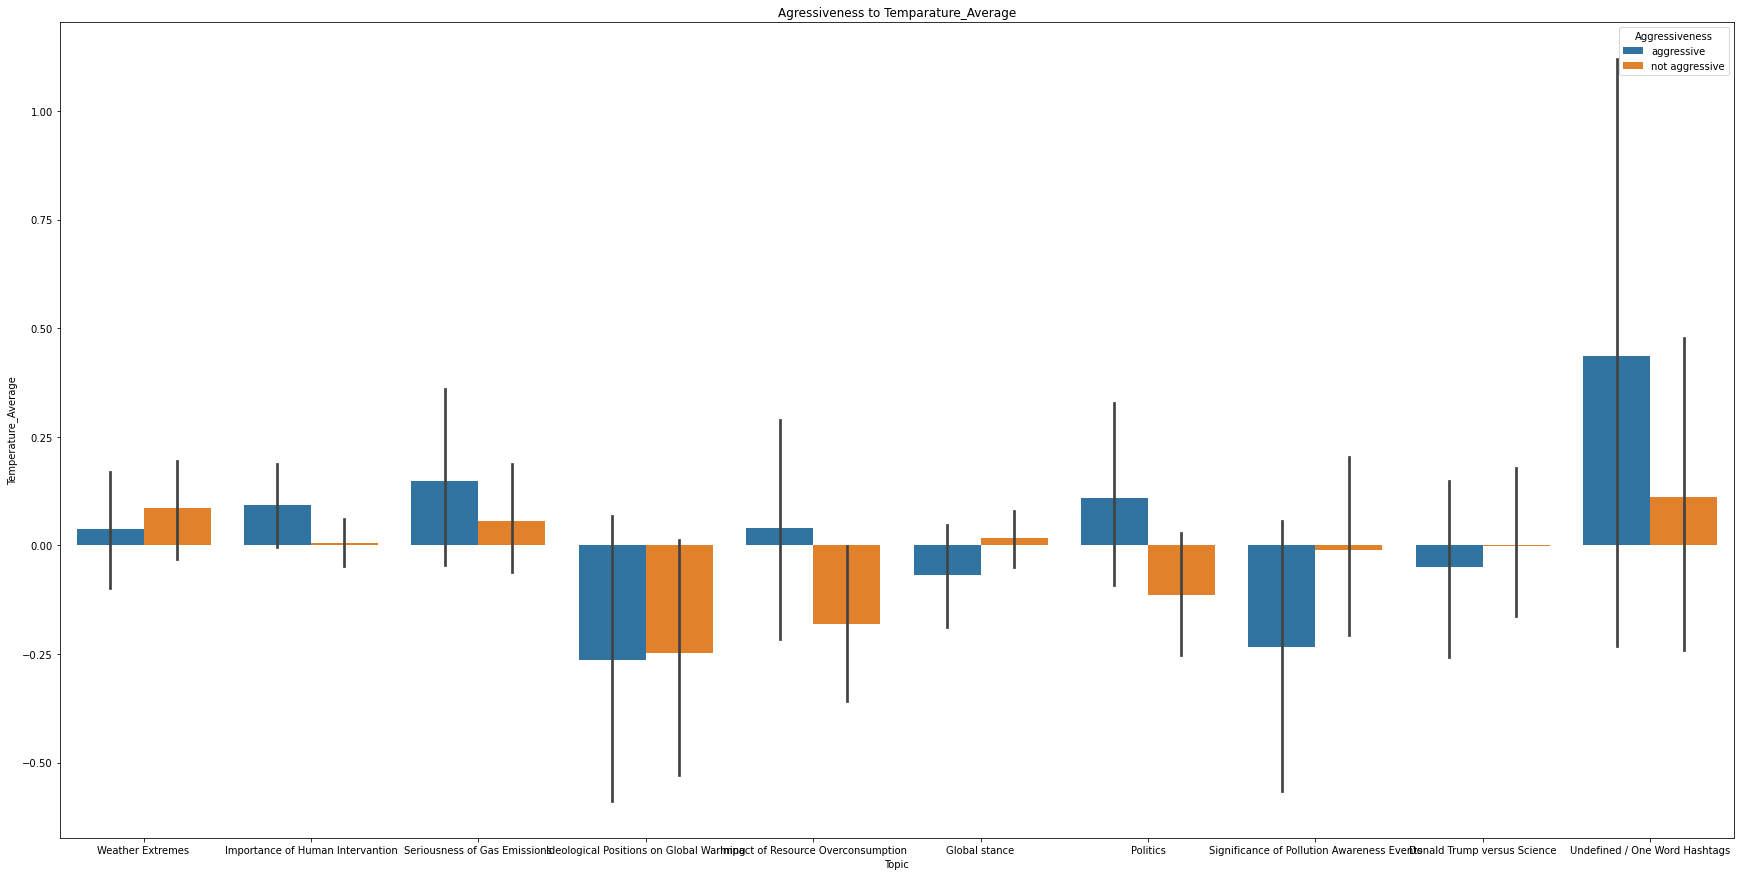

In [21]:
#setting figure size
ax = plt.figure(figsize=(30,15))

#barchart title
plt.title("Agressiveness to Temparature_Average") 

#setting x and y axis parameters
ax= sns.barplot(x = 'Topic',    
        y = 'Temperature_Average',
        hue = 'Aggressiveness',
        data = data)
#Show the plot
plt.show()

From the above bar chart, we took the temprature_average difference versus the topic to analyse how the climate differs 

The aggressiveness of the tweet on the topic importance of Human Intervantion is high than non-aggressiveness of the tweet, whereas the aggressiveness of the tweet  on the topic Positions on Global Warming is low than non-aggressiveness of the tweet.

# Histogram

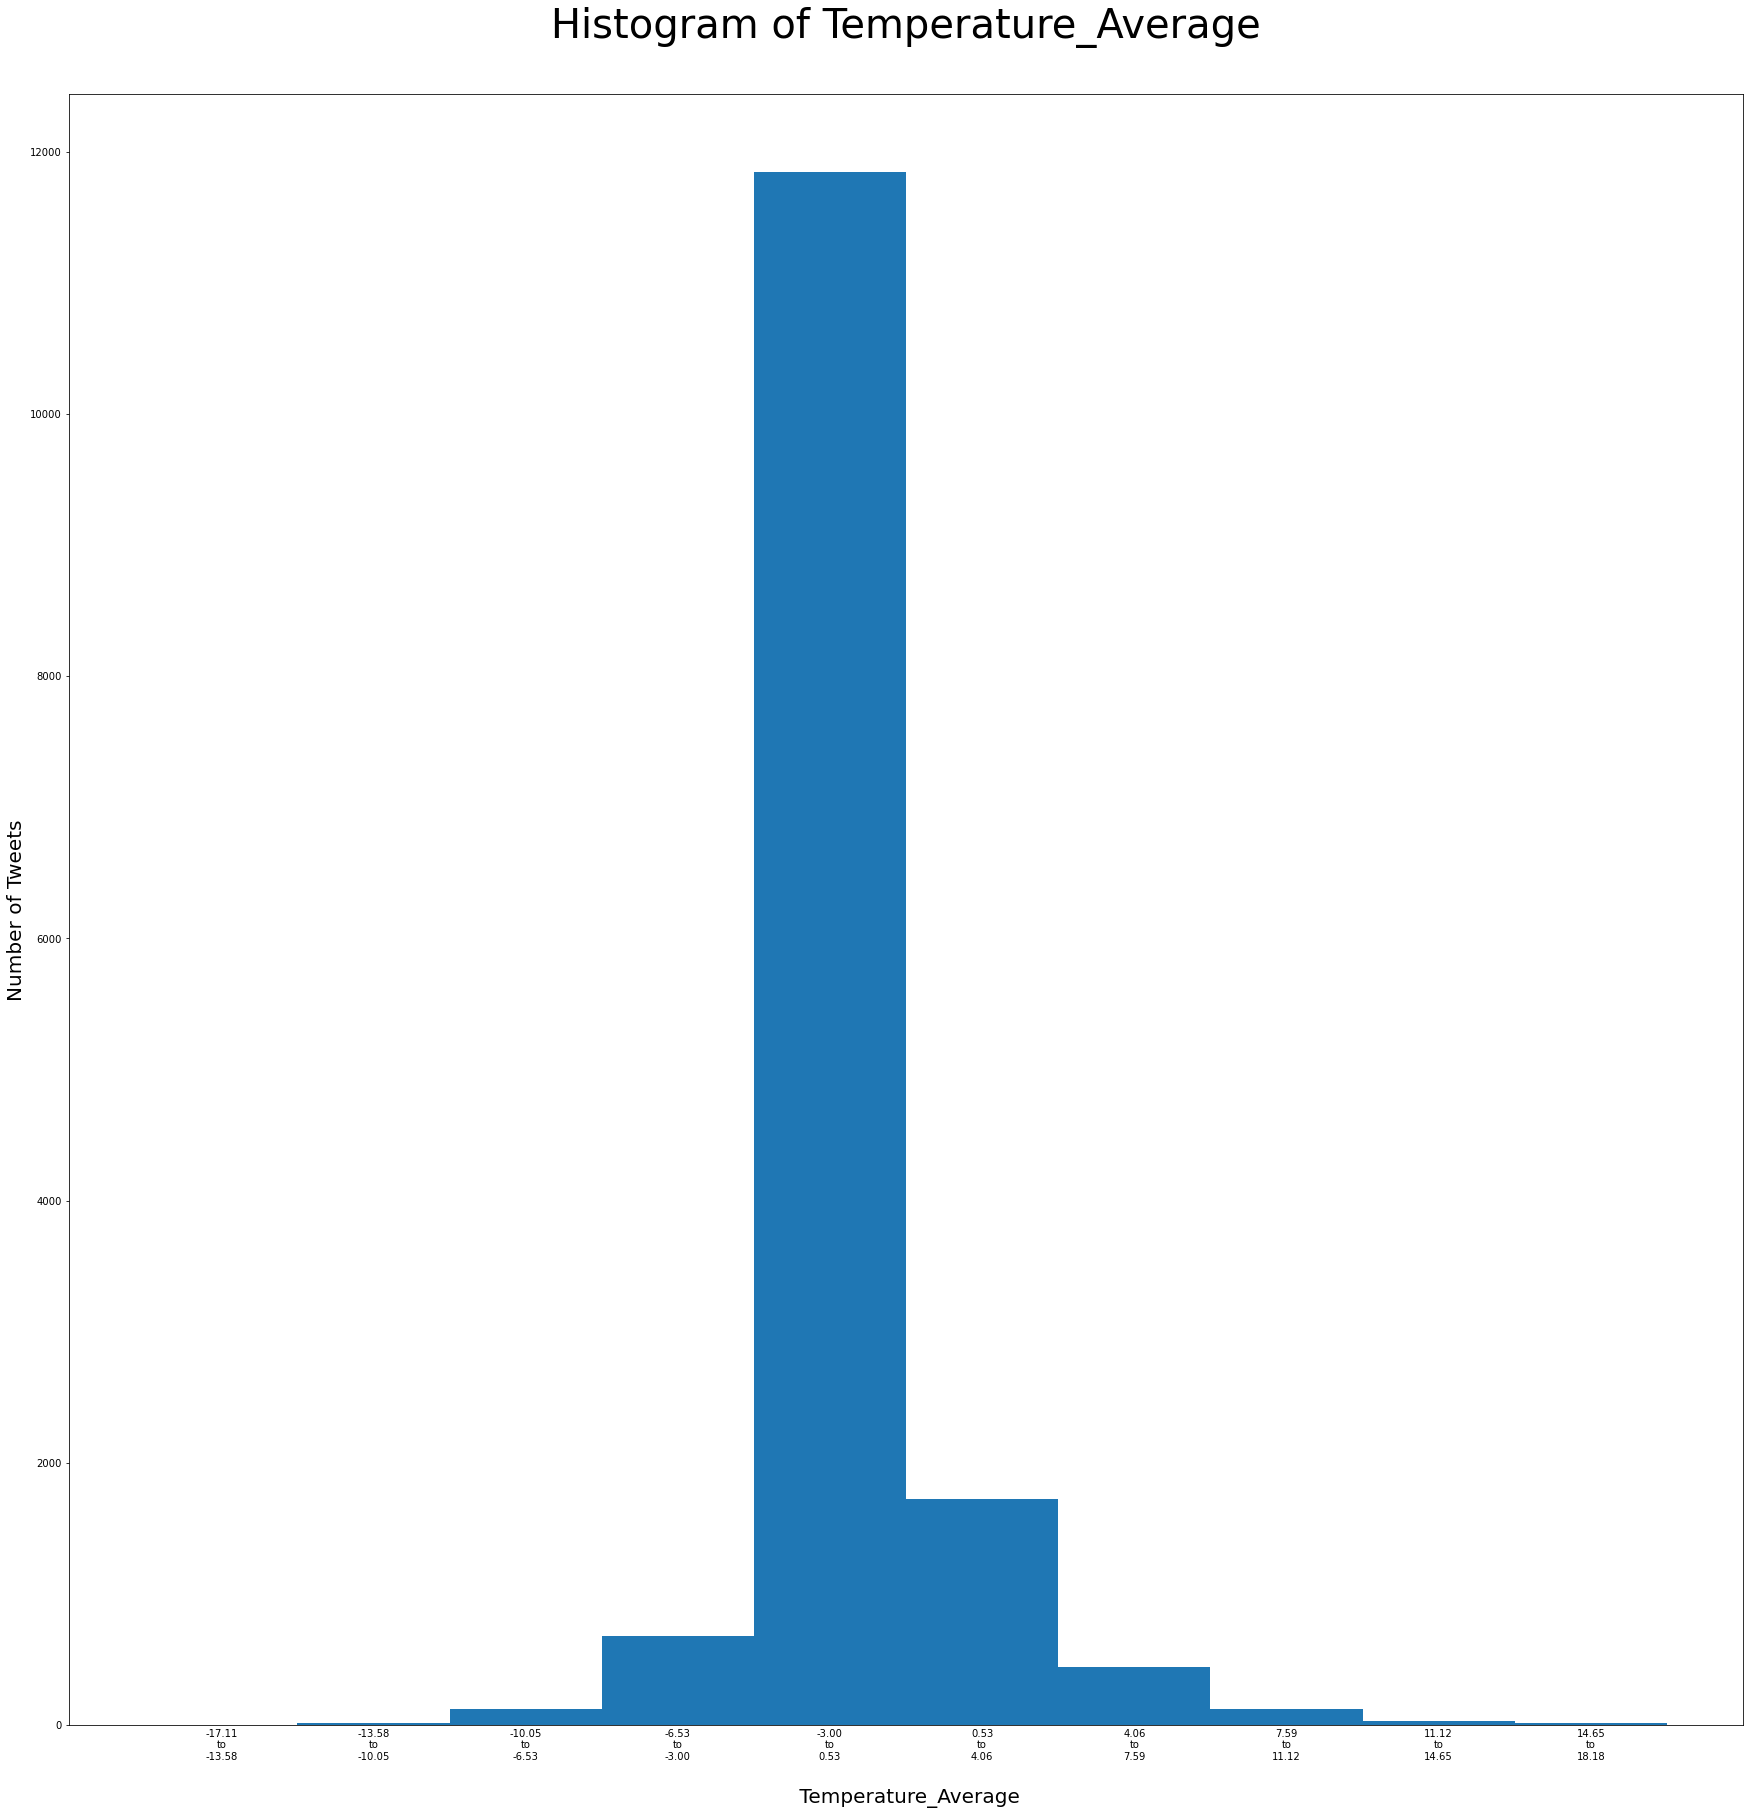

In [22]:
txt_color1 = '#252525'
txt_color2 = '#004C74'

fig, ax = plt.subplots(1,figsize=(30,30))
n, bins, patches = plt.hist(data.Temperature_Average)

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)

# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)


plt.title('Histogram of Temperature_Average\n', fontsize = 40) #Plot title
plt.xlabel('\n Temperature_Average', fontsize=20) #X-lable plot
plt.ylabel('Number of Tweets', fontsize=20) #Y-lable plot

plt.show()

**The above histogram provides frequency of tweets for temperature average range values. There are people more than 10000 tweeted about the climate change when the temperature average is inbetween 0.53 to 4.06. Less than 2000 people has tweeted when there is a drastic temparature drop or raise.**

In [23]:
data['Created Time'] = pd.to_datetime(data['Created Time']) #Converting the data type of the created time field from Object to datetime data type.
data.info(verbose=True) #Finding the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Created Time         14999 non-null  datetime64[ns, UTC]
 1   Longitude            14999 non-null  float64            
 2   Latitude             14999 non-null  float64            
 3   Topic                14999 non-null  object             
 4   Sentiment            14999 non-null  float64            
 5   Stance               14999 non-null  object             
 6   Gender               14999 non-null  object             
 7   Temperature_Average  14999 non-null  float64            
 8   Aggressiveness       14999 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), object(4)
memory usage: 1.0+ MB


# Box plot

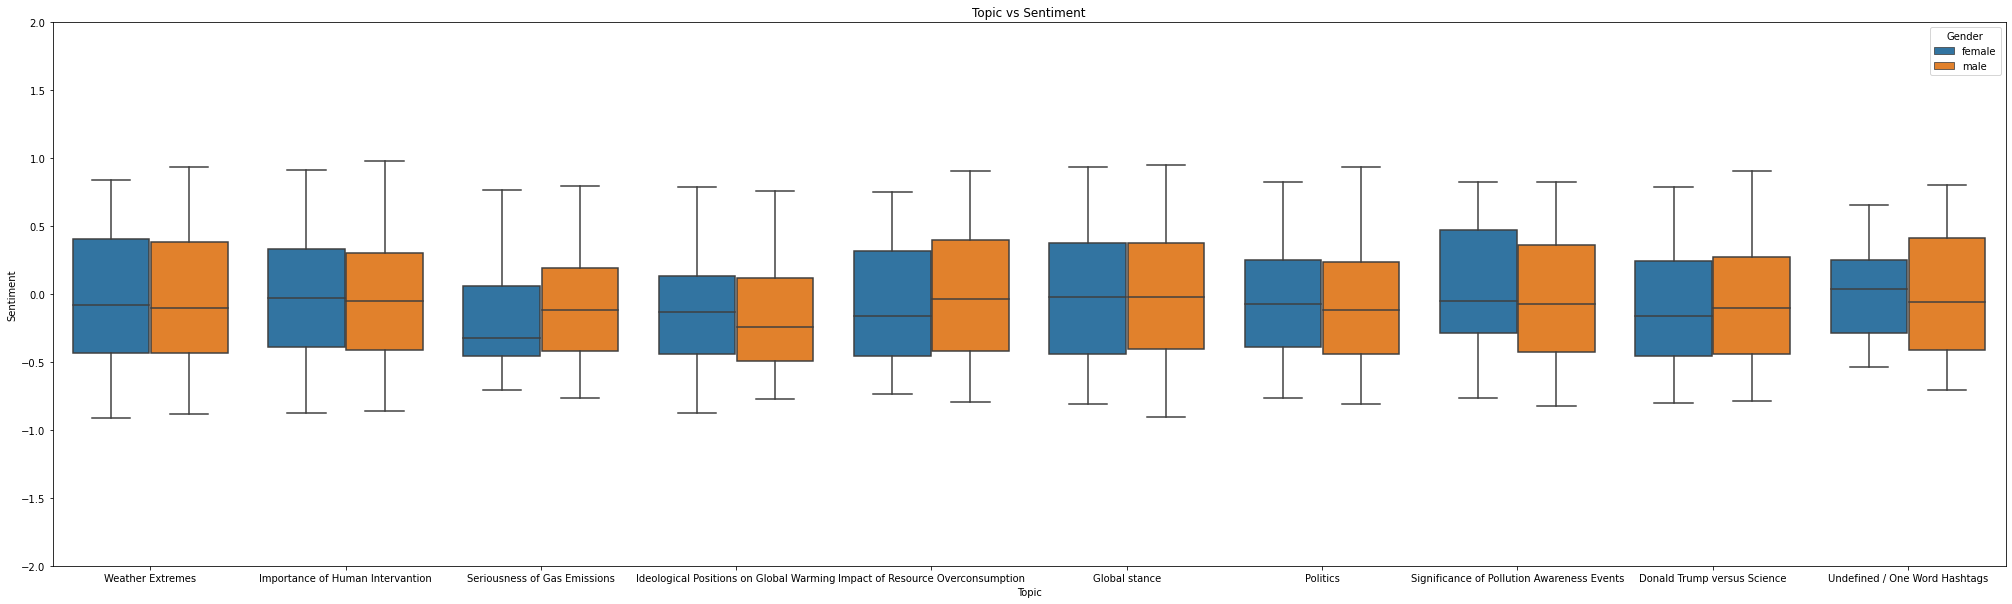

In [24]:
#adjusting the size of the figure
fig = plt.figure(figsize=(35,10)) 

#calling the box plot function by passing x and y axis from the dataset
fig=sns.boxplot(data=data, x = data['Topic'], y = data['Sentiment'],hue='Gender')

#setting the y-axis range
fig.set(ylim=(-2,2)) 

#defining the tile
plt.title('Topic vs Sentiment')

#Giving the  name of X-axis
plt.xlabel('Topic') 

#Giving the  name of y-axis
plt.ylabel('Sentiment')

plt.show()

For the above box plot, we considered several topics to do the sentimental analysis(Scales -1 to 1) with hue as the gender.
If Sentiment is near to +1 - It is leaned to Positive Sentiment and the sentiment is -1 - It is leaned to the negative Sentiment, and the 0 being the neutral.

For the topic - significance of pollution awareness events, tweets tweeted by female tend to be positive as their values are closer to 1 compared to male tweeted tweets.Similarly, for the topic Seriousness of Gas Emissions, tweets tweeted by female tend to be negative as their values are closer to 1 compared to male tweeted tweets.

# Line Graph

In [25]:
# A new column with only year values created and it is of integer format not datetime format
data['Year'] = data['Created Time'].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Created Time         14999 non-null  datetime64[ns, UTC]
 1   Longitude            14999 non-null  float64            
 2   Latitude             14999 non-null  float64            
 3   Topic                14999 non-null  object             
 4   Sentiment            14999 non-null  float64            
 5   Stance               14999 non-null  object             
 6   Gender               14999 non-null  object             
 7   Temperature_Average  14999 non-null  float64            
 8   Aggressiveness       14999 non-null  object             
 9   Year                 14999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(4)
memory usage: 1.1+ MB


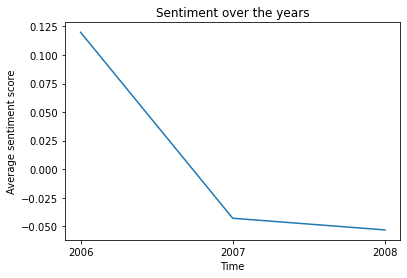

In [26]:
sentiment_list = []                 # Dummy list to store avg sentiment values          
year_list = data['Year'].unique()   # year_list list store the unique values of year

for val in year_list:               # For loop to calculate the average of sentiment for each year
  filt = (data['Year'] == val)      # A filter is created for each year
  df = data[filt]                   # A new dataframe is created with the above filter
  sentiment_list.append(df['Sentiment'].mean())       # Avg sentiment value is computed and appended to a list

# Line plot using matplotlib.pyplot library
import matplotlib.pyplot as plt

plt.plot(year_list, sentiment_list) #Plotting x-axis and y-axis 
plt.title('Sentiment over the years') #Title 
plt.xlabel('Time') #X-lable as Time
plt.ylabel('Average sentiment score') #Y-lable as Average Sentiment score
plt.xticks(year_list[::1], rotation='horizontal')     # This is to avoid overprinting of values on x-axis
plt.show()

**The line graph has been plotted for the dates of the tweets and the average sentiment values. Initially, in the year 2006, the average sentiment of the tweets were positive. Later, as the time goes on, in 2007, and 2008 the tweets were tending to neutral and then drastically tended to negative.**

# Scatter Plot

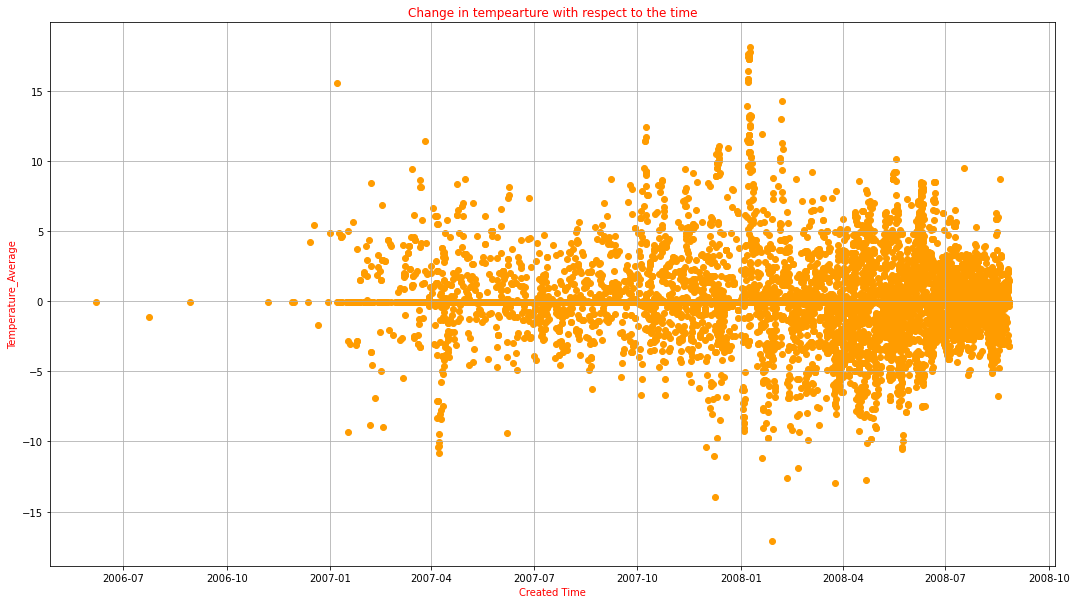

In [27]:
# x-axis values
temp = data['Temperature_Average']

# y-axis values
date= data['Created Time']

# plotting points as a scatter plot
plt.figure(figsize=(18,10)) #resizing the scatterplot
plt.scatter(date,temp, color= '#ff9c00') #Plotting scatter plot x-axis as Created Time and y-axis as Temperature_Average 

# x-axis label
plt.xlabel('Created Time', color = 'red')
# y-axis label
plt.ylabel('Temperature_Average', color='red')
# plot title
plt.title('Change in tempearture with respect to the time', color='red')
plt.grid(True) #displays a grid

# function to show the plot
plt.show()

**From the above scatter plot, we can infer that - the cluster is in between -5 to 5 which means there is an increase and decrease of temparature of -5 to 5 in years 2007-07 to 2008-10 compared to the temparature average during Jan 1951 to Dec 1980. Also the maximum temperature difference was -17 and 17. This determines that there might be few man-made factors gives rise to the temparature during the period of 2007 to 2008.**

# Heat Map

In [28]:
'''Creating a column named Column_Range with the Temperature average as range'''
col = "Temperature_Average"  #taking Temperature_Average column's values
#We are trying to create for all the following conditions 
conditions  = [((data[col] >= -17) & (data[col] < -13)),
               ((data[col] >= -13) & (data[col] < -9)),
               ((data[col] >= -9) & (data[col] < -5)),
               ((data[col] >= -5) & (data[col] < 0)),
               ((data[col] >= 0) & (data[col] < 5)),
               ((data[col] >= 5) & (data[col] < 9)),
               ((data[col] >= 9) & (data[col] < 13)),
               ((data[col] >= 13) & (data[col] < 17)),
               ((data[col] >= 17)),((data[col] < -17))]

#These are the choices for the above conditions
choices = ['(-17)-(-13)' ,'(-13)-(-9)','(-9)-(-5)','(-5)-0','0-5','5-9','9-13','13-17','>17','<-17']
#Creating the Temperature_Average_Range column and appending it for our data set 
data["Temperature_Average_Range"] = np.select(conditions, choices, default=np.nan)
print(data)

                   Created Time   Longitude   Latitude  \
0     2006-06-06 16:06:42+00:00  -82.554020  40.602206   
1     2006-07-23 21:52:30+00:00  -73.949582  40.650104   
2     2006-08-29 01:52:30+00:00  -82.554020  40.602206   
3     2006-11-07 02:46:52+00:00  -82.554020  40.602206   
4     2006-11-27 14:27:43+00:00  -82.554020  40.602206   
...                         ...         ...        ...   
14994 2008-08-26 09:55:54+00:00  -82.554020  40.602206   
14995 2008-08-26 10:30:11+00:00  -82.554020  40.602206   
14996 2008-08-26 10:32:45+00:00  -73.819300  43.731180   
14997 2008-08-26 11:48:58+00:00  -82.554020  40.602206   
14998 2008-08-26 12:01:19+00:00 -118.243680  34.052230   

                                  Topic  Sentiment    Stance  Gender  \
0                      Weather Extremes  -0.097180   neutral  female   
1                      Weather Extremes   0.575777   neutral    male   
2                      Weather Extremes   0.500479   neutral    male   
3              

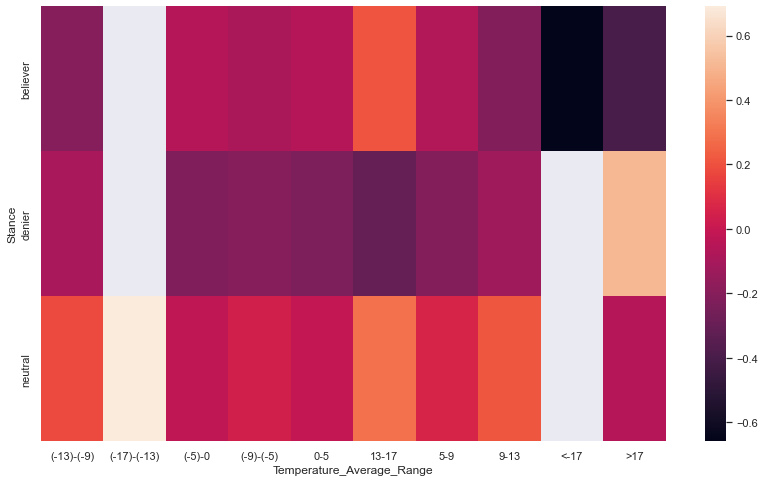

In [29]:
data_heatmap = data.pivot_table(values = "Sentiment", index = 'Stance', columns = "Temperature_Average_Range") #Taking variables to create the Heatmap
sns.set(rc = {'figure.figsize':(14,8)}) #setting the size of the figure
sns.heatmap(data_heatmap, annot = False)
plt.show() #To show the heatmap

**Above heat map shows that, when the temperature deviation has a extreme change around <-17 and >17 degree celsius there are more number of people who believed that the climate changes are due to man made with a negative statement and there were no deniers too.**

**When the temperanture average is in between 0 to 9 and 13 to 17 there were lot of deniers who does not believe in man made climate change.**

**When the temperature is >17 there were neutral tweets which neither believe nor denie the climate changes due to man made.**

# **The below visualizations depict with imputation.**


Reading the dataset again and storing it as new object data1

In [30]:
'''Loading the dataset to perform further steps'''
data1 =pd.read_csv("The Climate Change Twitter Data.csv")
print(data1)

                      created_at         id         lng        lat  \
0      2006-06-06 16:06:42+00:00       6132         NaN        NaN   
1      2006-07-23 21:52:30+00:00      13275  -73.949582  40.650104   
2      2006-08-29 01:52:30+00:00      23160         NaN        NaN   
3      2006-11-07 02:46:52+00:00      57868         NaN        NaN   
4      2006-11-27 14:27:43+00:00     304553         NaN        NaN   
...                          ...        ...         ...        ...   
14994  2008-08-26 09:55:54+00:00  899157876         NaN        NaN   
14995  2008-08-26 10:30:11+00:00  899175411         NaN        NaN   
14996  2008-08-26 10:32:45+00:00  899176876  -73.819300  43.731180   
14997  2008-08-26 11:48:58+00:00  899223020         NaN        NaN   
14998  2008-08-26 12:01:19+00:00  899231717 -118.243680  34.052230   

                                  topic  sentiment    stance     gender  \
0                      Weather Extremes  -0.097180   neutral     female   
1        

In [31]:
###Renaming the Column Headers
data1 = data1.rename(columns={'created_at':'Created Time', 'id':'Twitter Unique_ID', 'lng':'Longitude', 'lat':'Latitude', 
                            'topic':'Topic', 'sentiment':'Sentiment', 'stance':'Stance', 'gender':'Gender',
                            'temperature_avg':'Temperature_Average','aggressiveness':'Aggressiveness'
                           })
data1.head()

,Created Time,Twitter Unique_ID,Longitude,Latitude,Topic,Sentiment,Stance,Gender,Temperature_Average,Aggressiveness
0,2006-06-06 16:06:42+00:00,6132,NaN,NaN,Weather Extremes,-0.097180,neutral,female,NaN,aggressive
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive
2,2006-08-29 01:52:30+00:00,23160,NaN,NaN,Weather Extremes,0.500479,neutral,male,NaN,aggressive
3,2006-11-07 02:46:52+00:00,57868,NaN,NaN,Weather Extremes,0.032816,neutral,male,NaN,aggressive
4,2006-11-27 14:27:43+00:00,304553,NaN,NaN,Importance of Human Intervantion,-0.090428,neutral,male,NaN,aggressive


**We are now taking all the columns and filling the missing values using KNN Imputation**

In [32]:
impute_column = pd.DataFrame(data1 ,columns = ['Temperature_Average','Longitude','Latitude'])
impute_column

,Temperature_Average,Longitude,Latitude
0,NaN,NaN,NaN
1,-1.114768,-73.949582,40.650104
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
14994,NaN,NaN,NaN
14995,NaN,NaN,NaN
14996,-3.176450,-73.819300,43.731180
14997,NaN,NaN,NaN


In [33]:
imputer = KNNImputer(n_neighbors=4) #Using KNN imputer to fill the missing values
after_imputation = imputer.fit_transform(impute_column) #imputing the column, from above line
after_imputation

array([[ 1.17681220e-01, -5.93774050e+01,  3.69252173e+01],
       [-1.11476810e+00, -7.39495823e+01,  4.06501038e+01],
       [ 1.17681220e-01, -5.93774050e+01,  3.69252173e+01],
       ...,
       [-3.17645000e+00, -7.38193000e+01,  4.37311800e+01],
       [ 1.17681220e-01, -5.93774050e+01,  3.69252173e+01],
       [ 1.45760460e+00, -1.18243680e+02,  3.40522300e+01]])

In [34]:
impute_column = pd.DataFrame(after_imputation ,columns = ['Temperature_Average','Longitude','Latitude']) 
#filled all the missing values for the mentioned columns using KNN imputator
impute_column

,Temperature_Average,Longitude,Latitude
0,0.117681,-59.377405,36.925217
1,-1.114768,-73.949582,40.650104
2,0.117681,-59.377405,36.925217
3,0.117681,-59.377405,36.925217
4,0.117681,-59.377405,36.925217
...,...,...,...
14994,0.117681,-59.377405,36.925217
14995,0.117681,-59.377405,36.925217
14996,-3.176450,-73.819300,43.731180
14997,0.117681,-59.377405,36.925217


In [35]:
impute_column.isnull().sum() #checking the null values for the columns

Temperature_Average    0
Longitude              0
Latitude               0
dtype: int64

In [36]:
'''Assigning the values to the columns of our data set'''
data1['Longitude'] = impute_column['Longitude']
data1['Latitude'] = impute_column['Latitude']
data1['Temperature_Average'] = impute_column['Temperature_Average']


In [37]:
data1.isnull().sum() #checking missing values for these columns from our data set

Created Time           0
Twitter Unique_ID      0
Longitude              0
Latitude               0
Topic                  0
Sentiment              0
Stance                 0
Gender                 0
Temperature_Average    0
Aggressiveness         0
dtype: int64

# BAR CHART WITHOUT AND WITH Imputator

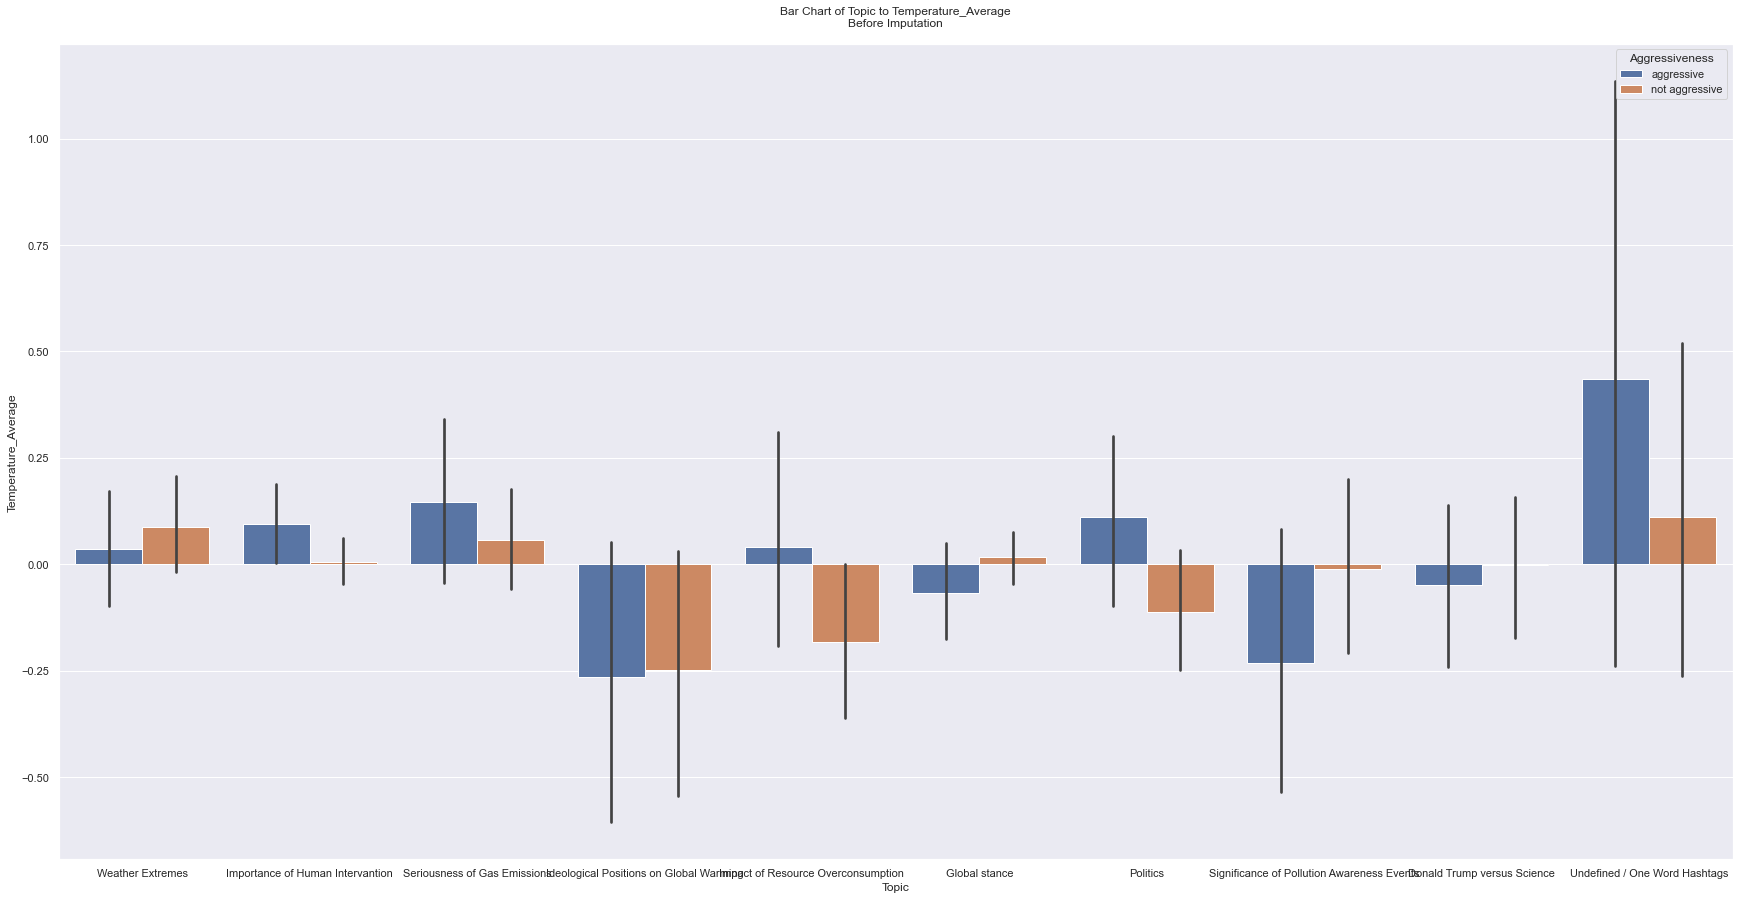

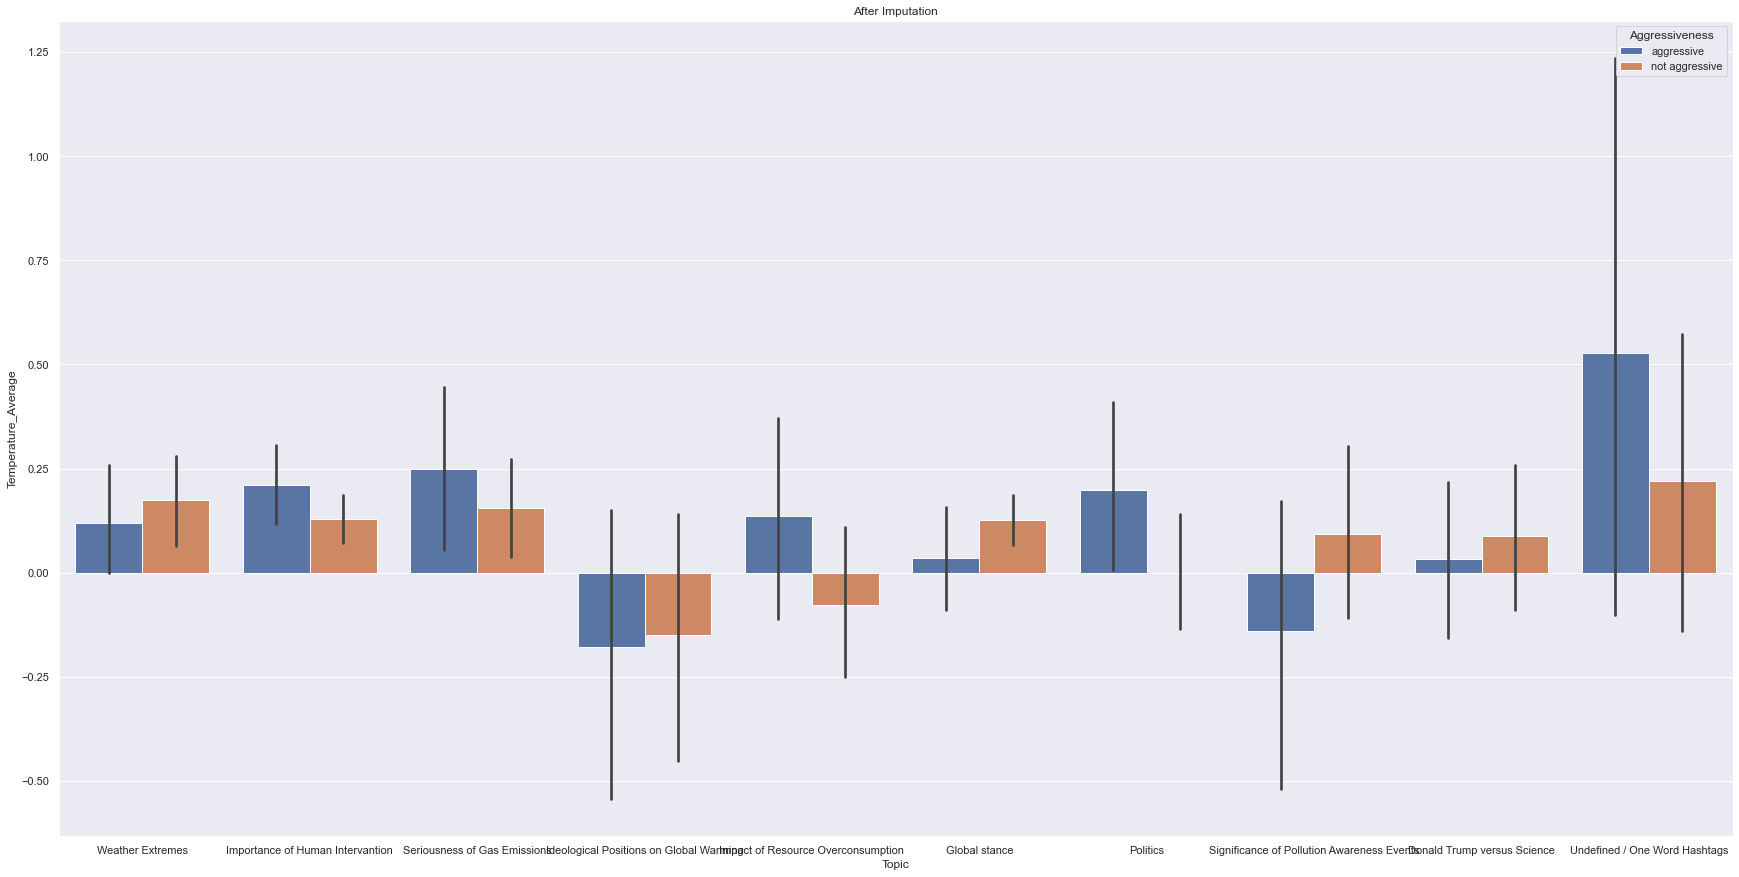

In [38]:
fig = plt.subplots(figsize=(30,15))  #figure size
plt.title("Bar Chart of Topic to Temperature_Average\nBefore Imputation\n") #barchart title
#plt.title("Topic to Temparature_Average")
sns.barplot(x = 'Topic',    #setting x and y axis parameters
            y = 'Temperature_Average',
            hue = 'Aggressiveness',
            data = data)

plt.show()

fig = plt.subplots(figsize=(30,15)) 
plt.title("After Imputation")
#plt.title("Topic to Temparature_Average")
sns.barplot(x = 'Topic',    #setting x and y axis parameters
            y = 'Temperature_Average',
            hue = 'Aggressiveness',
            data = data1)
    
# Show the plot
plt.show()

# HISTOGRAM WITHOUT AND WITH IMPUTATION

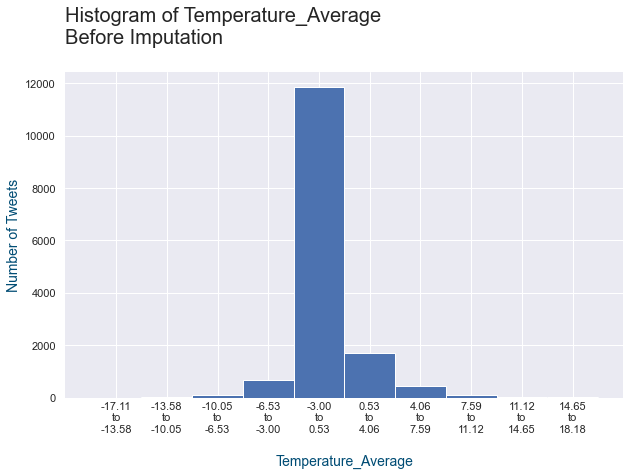

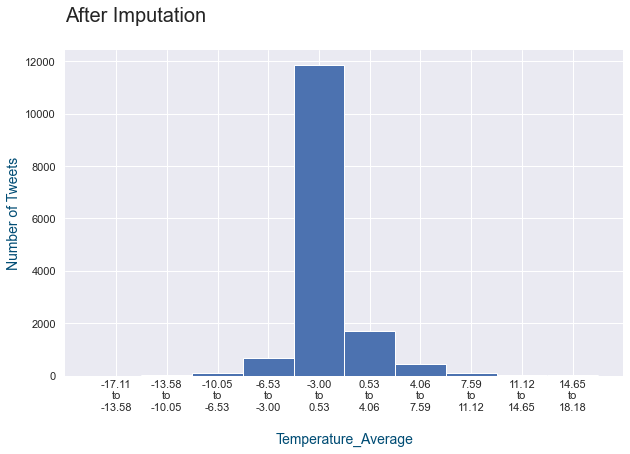

In [39]:
txt_color1 = '#252525'
txt_color2 = '#004C74'

fig, ax = plt.subplots(1,figsize=(10,6))
n, bins, patches = plt.hist(data.Temperature_Average)

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)


# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Histogram of Temperature_Average\nBefore Imputation\n', loc = 'left', fontsize = 20, c=txt_color1)
plt.xlabel('\nTemperature_Average', c=txt_color2, fontsize=14)
plt.ylabel('Number of Tweets', c=txt_color2, fontsize=14)

plt.show()

fig, ax = plt.subplots(1,figsize=(10,6))
n, bins, patches = plt.hist(data1.Temperature_Average)

# x ticks
xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
xticks_labels = [ "{:.2f}\nto\n{:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
plt.xticks(xticks, labels = xticks_labels)


# remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='x', which='both',length=0)
# Hide the right and top spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('After Imputation\n', loc = 'left', fontsize = 20, c=txt_color1)
plt.xlabel('\nTemperature_Average', c=txt_color2, fontsize=14)
plt.ylabel('Number of Tweets', c=txt_color2, fontsize=14)

plt.show()




# Conclusion

**Overall it can be concluded that, the people are more agrressive when the temperature average difference is higher during 2006 and 2008 and the topic is related to extreme weather change and the tweets of the people also tend to negative sentiment. Also males are more aggressive compared to female while explaining their concern on the climate change.**

# **Recommendations:**

1. The analysis can be more accurate if the dataset explains whether the topic given are direcrtly related to the climate change.
2. More information about the Temperature difference and the time, location of the tweets.
3. The analysis would be more accurate if the dataset has other numerical columns explaining about the climate change and the sentiment analysis.
4. More information about the Sentiment and its impact with the climate change.